In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
with requests.get('https://florincoin.info/api/getnetworkhashps', verify=False) as response:
    html = response.text

net_hash_ps = float(html)

/Users/owenmorris/anaconda/lib/python3.6/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'florincoin.info'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [37]:
with requests.get('https://livenet.flocha.in/api/status?q=getInfo') as response:
    html = response.text
flocha_json = json.loads(html)
html

'{"info":{"version":"flocore-5.0.0","blocks":4112380,"proxy":"","difficulty":823,"testnet":false,"relayfee":0,"errors":"","network":"livenet"}}'

In [38]:
with requests.get('https://api.bittrex.com/api/v1.1/public/getmarketsummary?market=btc-flo') as response:
    html = response.text
bitrex_json = json.loads(html)
html

'{"success":true,"message":"","result":[{"MarketName":"BTC-FLO","High":0.00000298,"Low":0.00000260,"Volume":149706.70526408,"Last":0.00000272,"BaseVolume":0.42051520,"TimeStamp":"2020-05-17T17:19:15.02","Bid":0.00000262,"Ask":0.00000272,"OpenBuyOrders":136,"OpenSellOrders":1383,"PrevDay":0.00000271,"Created":"2015-03-11T05:43:30.193"}]}'

In [39]:
with requests.get('https://www.miningrigrentals.com/api/v2/info/algo/scrypt') as response:
    html = response.text
rental_json = json.loads(html)
html

'{"success":true,"data":{"name":"scrypt","display":"Scrypt","suggested_price":{"amount":"0.00019585","currency":"BTC","unit":"gh*day"},"stats":{"available":{"rigs":"347","hash":{"hash":"43460.281055831","unit":"gh","nice":"43.46T"}},"rented":{"rigs":"181","hash":{"hash":"1013.1841825921","unit":"gh","nice":"1.01T"}},"prices":{"lowest":{"amount":"0.00014092","currency":"BTC","unit":"gh*day"},"last_10":{"amount":"0.00025468","currency":"BTC","unit":"gh*day"},"last_20":{"amount":"0.00026172","currency":"BTC","unit":"gh*day"},"last_30":{"amount":"0.00025924","currency":"BTC","unit":"gh*day"},"last":{"amount":"0.00025626","currency":"BTC","unit":"gh*day"}}},"new":false,"hot":true,"hashtype":"gh","pool_option1":null}}'

In [40]:
with requests.get('https://api.bittrex.com/api/v1.1/public/getmarketsummary?market=usd-btc') as response:
    html = response.text
bitrex2_json = json.loads(html)
html

'{"success":true,"message":"","result":[{"MarketName":"USD-BTC","High":9900.00100000,"Low":9251.18200000,"Volume":1207.57227391,"Last":9741.15000000,"BaseVolume":11581740.05149150,"TimeStamp":"2020-05-17T17:19:20.037","Bid":9738.00900000,"Ask":9746.96500000,"OpenBuyOrders":6041,"OpenSellOrders":3171,"PrevDay":9367.78900000,"Created":"2018-05-31T13:24:40.77"}]}'

In [41]:
with requests.get('https://www.miningrigrentals.com/api/v2/info/algo/sha256') as response:
    html = response.text
sharental_json = json.loads(html)
html

'{"success":true,"data":{"name":"sha256","display":"Sha256","suggested_price":{"amount":"0.00000946","currency":"BTC","unit":"th*day"},"stats":{"available":{"rigs":"379","hash":{"hash":"490668.55633892","unit":"th","nice":"490.67P"}},"rented":{"rigs":"200","hash":{"hash":"12007.052312116","unit":"th","nice":"12.01P"}},"prices":{"lowest":{"amount":"0.00000974","currency":"BTC","unit":"th*day"},"last_10":{"amount":"0.00001100","currency":"BTC","unit":"th*day"},"last_20":{"amount":"0.00001100","currency":"BTC","unit":"th*day"},"last_30":{"amount":"0.00001100","currency":"BTC","unit":"th*day"},"last":{"amount":"0.00000946","currency":"BTC","unit":"th*day"}}},"new":false,"hot":true,"hashtype":"th","pool_option1":null}}'

In [42]:
with requests.get('https://blockchain.info/q/getdifficulty') as response:
    btc_difficulty = float(response.text)
#btc_json = json.loads(html)
#float(html)
btc_difficulty

16104807485529.0

In [43]:
with requests.get('https://blockchain.info/q/getblockcount') as response:
    btc_block = float(response.text)
#btc_json = json.loads(html)
#float(html)
btc_block

630722.0

In [44]:
with requests.get('https://blockchain.info/q/hashrate') as response:
    print(response.text)
    #print(response.code)
    btc_hashrate = int(response.text)
#btc_json = json.loads(html)
#float(html)
btc_hashrate

80057432244


80057432244

In [45]:
print(type(bitrex2_json['result'][0]))
bitrex2_json['result'][0]['Last']

<class 'dict'>


9741.15

In [46]:
cols = ['timestamp', 'FLONetworkHashesPs', 'FLOdifficulty',  'FLOblocks', 'BTChashrate', 'BTCdifficulty', 'BTCblocks',
       'FLOvolume', 'FLOopenBuy', 'FLOopenSell', 'FLOlow', 'FLOhigh', 'FLObid', 'FLOask', 'FLObaseVol',
       'BTCvolume', 'BTCopenBuy', 'BTCopenSell', 'BTClow', 'BTChigh', 'BTCbid', 'BTCask', 'BTCbaseVol',
       'FLOlast', 'BTClast', 'scrypt_price', 'scrypt_avail', 'scrypt_rented', 'scrypt_last30',
       'sha_price', 'sha_avail', 'sha_rented', 'sha_last30']


flo_diff = flocha_json['info']['difficulty']
flo_blocks = flocha_json['info']['blocks']
btc_diff = btc_difficulty
btc_blocks = btc_block

flo_vol = bitrex_json['result'][0]['Volume']
flo_open_buy = bitrex_json['result'][0]['OpenBuyOrders']
flo_open_sell = bitrex_json['result'][0]['OpenSellOrders']
flo_low = bitrex_json['result'][0]['Low']
flo_high = bitrex_json['result'][0]['High']
flo_bid = bitrex_json['result'][0]['Bid']
flo_ask = bitrex_json['result'][0]['Ask']
flo_baseVol = bitrex_json['result'][0]['BaseVolume']


btc_vol = bitrex2_json['result'][0]['Volume']
btc_open_buy = bitrex2_json['result'][0]['OpenBuyOrders']
btc_open_sell = bitrex2_json['result'][0]['OpenSellOrders']
btc_low = bitrex2_json['result'][0]['High']
btc_high = bitrex2_json['result'][0]['Low']
btc_bid = bitrex2_json['result'][0]['Bid']
btc_ask = bitrex2_json['result'][0]['Ask']
btc_baseVol = bitrex2_json['result'][0]['BaseVolume']

last_flo_btc = bitrex_json['result'][0]['Last']
last_btc_usd = bitrex2_json['result'][0]['Last']

scrypt_rent_price = rental_json['data']['suggested_price']['amount']
scrypt_rigs_avail = rental_json['data']['stats']['available']['rigs']
scrypt_rigs_rented = rental_json['data']['stats']['rented']['rigs']
scrypt_30 = rental_json['data']['stats']['prices']['last_30']['amount']

sha_rent_price = sharental_json['data']['suggested_price']['amount']
sha_rigs_avail = sharental_json['data']['stats']['available']['rigs']
sha_rigs_rented = sharental_json['data']['stats']['rented']['rigs']
sha_30 = sharental_json['data']['stats']['prices']['last_30']['amount']

#construct the dataframe
df = pd.DataFrame(columns=cols)
df.loc[0] = [datetime.utcnow(), net_hash_ps, flo_diff, flo_blocks, btc_hashrate, btc_diff, btc_blocks, flo_vol, flo_open_buy,
            flo_open_sell, flo_low, flo_high, flo_bid, flo_ask, flo_baseVol, btc_vol, btc_open_buy, btc_open_sell,
            btc_low, btc_high, btc_bid, btc_ask, btc_baseVol, last_flo_btc, last_btc_usd, scrypt_rent_price,
            scrypt_rigs_avail, scrypt_rigs_rented, scrypt_30, sha_rent_price, sha_rigs_avail, sha_rigs_rented, sha_30]


In [47]:
df.head()

,timestamp,FLONetworkHashesPs,FLOdifficulty,FLOblocks,BTChashrate,BTCdifficulty,BTCblocks,FLOvolume,FLOopenBuy,FLOopenSell,...,FLOlast,BTClast,scrypt_price,scrypt_avail,scrypt_rented,scrypt_last30,sha_price,sha_avail,sha_rented,sha_last30
0,2020-05-17 17:19:23.103905,6.014403e+10,823,4112380,80057432244,1.610481e+13,630722.0,149706.705264,136,1383,...,0.000003,9741.15,0.00019585,347,181,0.00025924,0.00000946,379,200,0.00001100


In [48]:
#df.to_csv('data/FLO_data_miner.csv')

In [22]:
existing_df = pd.read_csv('data/FLO_data_miner-test.csv', index_col=0)
#result_df = pd.concat([existing_df, df])
#result_df = existing_df.append(df)
#result_df.to_csv('data/FLO_data_miner-test.csv')

In [50]:
result_df.shape[0]

1886

In [32]:
existing_df = pd.read_csv('data/FLO_data_miner.csv', index_col=0)

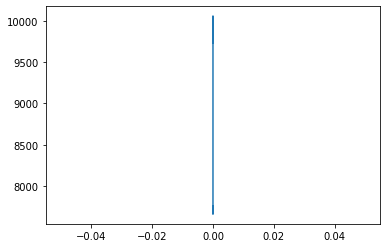

In [17]:
existing_df.tail()
existing_df.BTClast.plot()

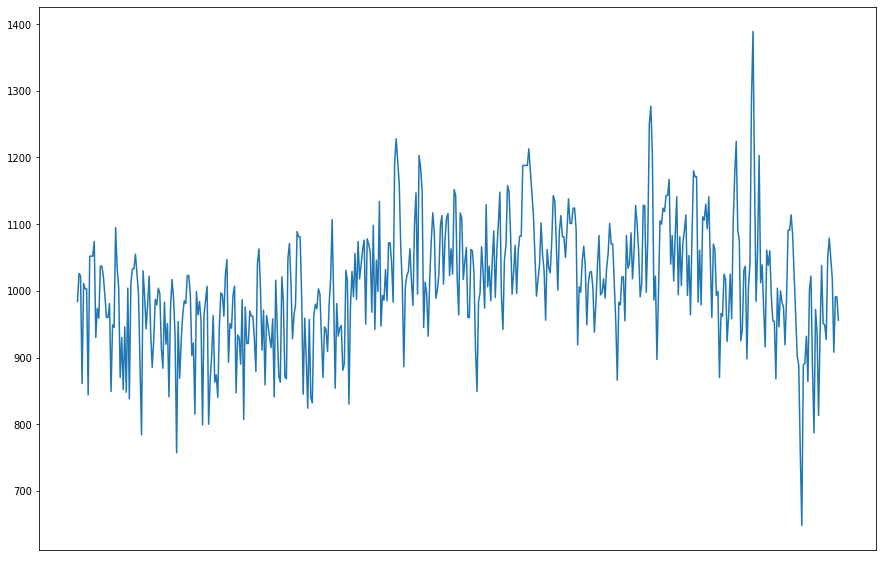

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(existing_df['timestamp'].tail(show), existing_df['FLOdifficulty'].tail(show))
ax.get_xaxis().set_visible(False)
#plt.yscale('log')

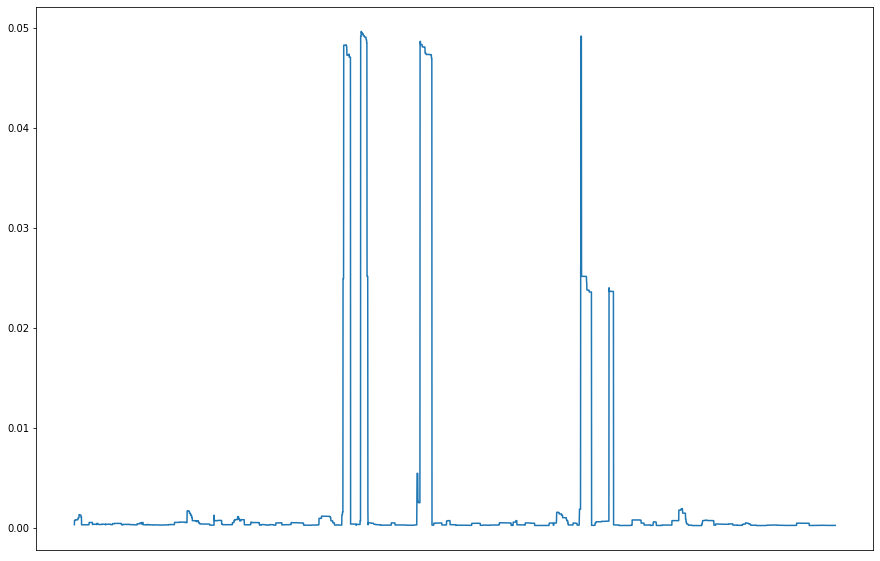

In [142]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(existing_df['timestamp'], existing_df['scrypt_last30'])
ax.get_xaxis().set_visible(False)

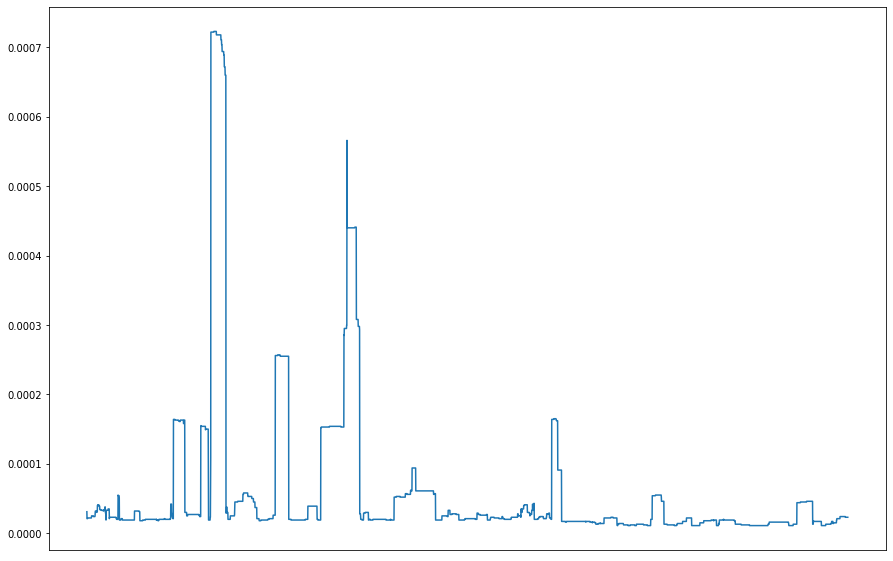

In [143]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(existing_df['timestamp'], existing_df['sha_last30'])
ax.get_xaxis().set_visible(False)

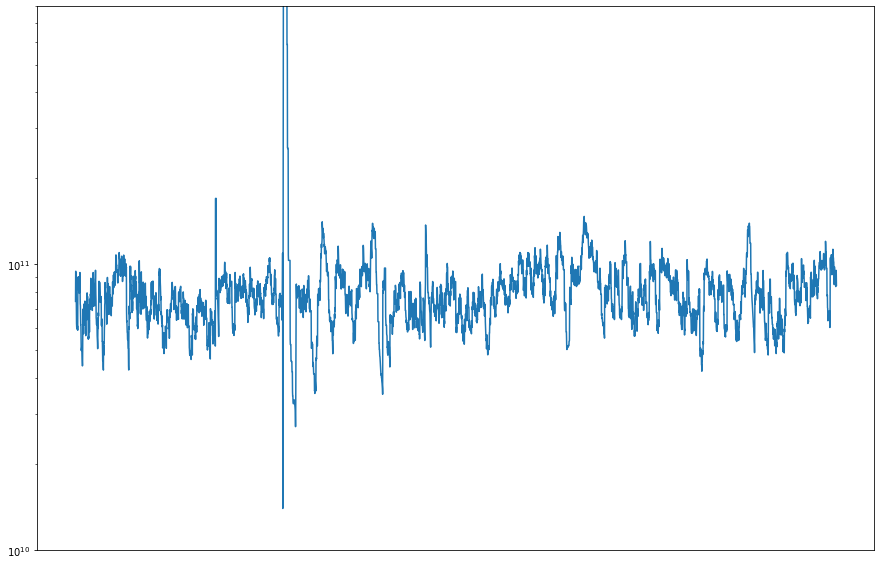

In [144]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(existing_df['timestamp'], existing_df['FLONetworkHashesPs'])
ax.get_xaxis().set_visible(False)
plt.ylim(1*10**10, .8*10**12)
plt.yscale('log')

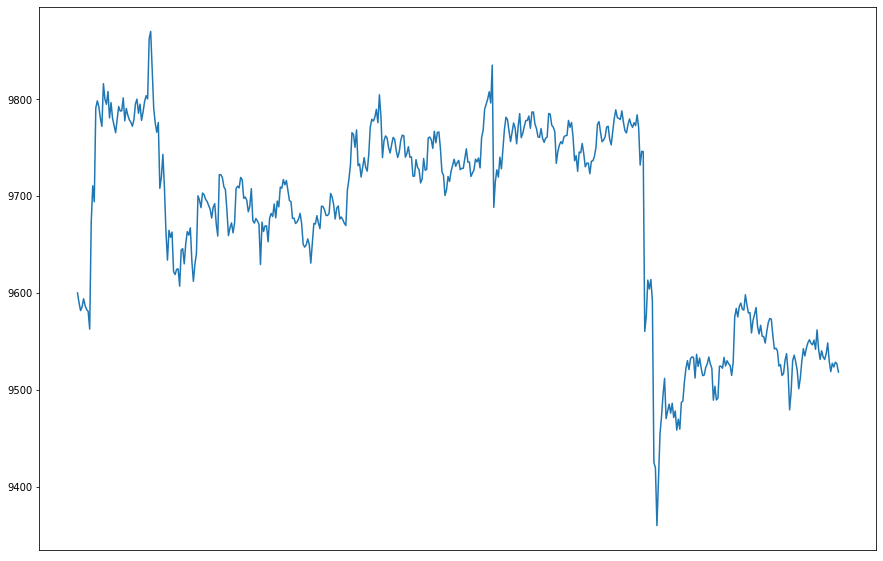

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
show = 500
ax.plot(existing_df['timestamp'].tail(show), existing_df['BTClast'].tail(show))
ax.get_xaxis().set_visible(False)

In [123]:
df = existing_df[['timestamp', 'BTClast']]
#df.timestamp = df['timestamp'].map(lambda x : pd.to_datetime(x))
df.head()

,timestamp,BTClast
0,2020-04-27 14:15:38.083451,7759.997
0,2020-04-27 14:15:38.083451,7759.997
0,2020-04-27 14:56:09.914743,7672.969
0,2020-04-27 15:03:50.410148,7670.014
0,2020-04-27 15:13:54.327730,7676.455


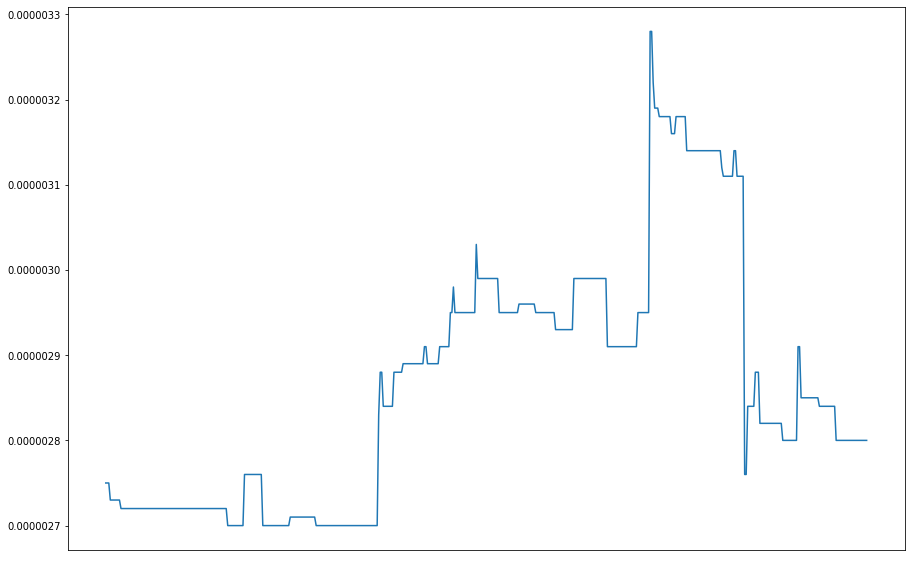

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(existing_df['timestamp'].tail(show), existing_df['FLOlast'].tail(show))
ax.get_xaxis().set_visible(False)

In [125]:
# fig, ax = plt.subplots(figsize=(15,10))
# ax.plot(existing_df['timestamp'], existing_df['FLOopenBuy'])
# ax.plot(existing_df['timestamp'], existing_df['FLOopenSell'])
# ax.get_xaxis().set_visible(False)

In [26]:
existing_df['FLO-USD'] = existing_df['FLOlast'] * existing_df['BTClast']

(0.02, 0.03)

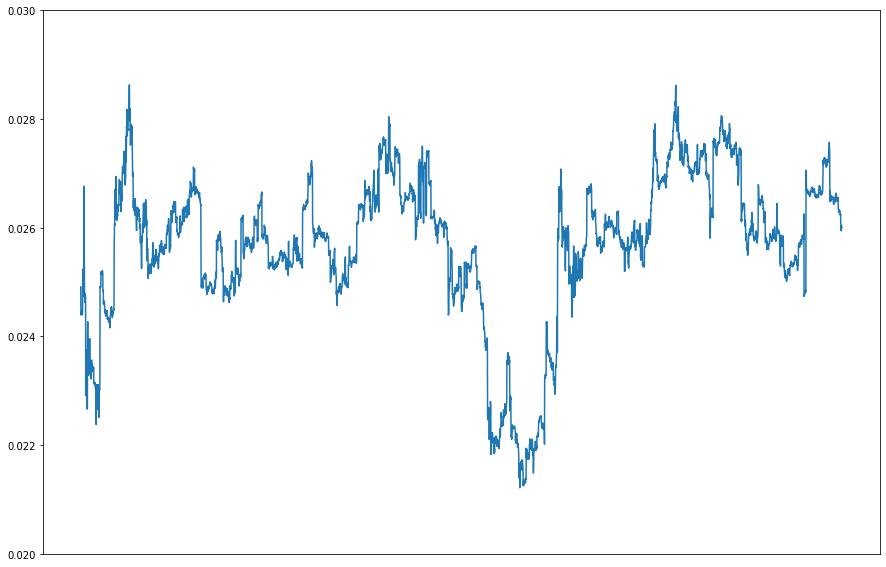

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(existing_df['timestamp'], existing_df['FLO-USD'])
ax.get_xaxis().set_visible(False)
fig.canvas.set_window_title('FLO-USD from Calculation')
plt.ylim(0.02, 0.03)